<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Week- 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### Import the required libraries

In [39]:
# type your code here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import scipy.stats as st
from sklearn.model_selection import train_test_split

#### Read the data

Load the csv file and set the first column as index

In [2]:
# type your code here

df_car = pd.read_csv('car_data.csv',index_col = 'Car_Name')

df_car.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Car_Name,,,,,,,,
ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Our objective is to predict the selling price of the cars data.

**The data definition is as follows:** <br><br>
**Car_Name:** name of the car <br>

**YearThis:** year in which the car was bought <br>

**Present_Price:** current ex-showroom price of the car (in lakhs)<br>

**Kms_Driven:** distance completed by the car in km <br>

**Fuel_Type:** fuel type of the car <br>

**Seller_Type:** defines whether the seller is a dealer or an individual<br>

**Transmission:** defines whether the car is manual or automatic <br>

**Owner:** defines the number of owners the car has previously had <br>

**Selling_Price:** price the owner wants to sell the car at (in lakhs) (response variable)

In [3]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, ritz to brio
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 21.2+ KB


In [4]:
df_car['Year'].unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007], dtype=int64)

In [5]:
df_car['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [6]:
df_car['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [7]:
df_car['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [8]:
df_car['Owner'].unique()

array([0, 1, 3], dtype=int64)

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Build a full model and interpret the beta coefficients </b>
                </font>
            </div>
        </td>
    </tr>
</table>

        Hint: A full model is a model which includes all the features 

In [9]:
df_car.shape

(301, 8)

In [10]:
df_car.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [11]:
# type your code here

X=df_car[['Year','Present_Price','Kms_Driven','Owner']]

encoded_data = pd.get_dummies(data= df_car[['Fuel_Type','Seller_Type','Transmission']],drop_first=True)

X =  pd.concat([pd.DataFrame(X),encoded_data],axis=1)

X = sm.add_constant(X)

Y = df_car['Selling_Price']


SLR_full_model = sm.OLS(Y,X).fit()

print(SLR_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     274.3
Date:                Sat, 19 Feb 2022   Prob (F-statistic):          5.71e-131
Time:                        20:24:29   Log-Likelihood:                -593.62
No. Observations:                 301   AIC:                             1205.
Df Residuals:                     292   BIC:                             1239.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -789

The beta coefficient is the degree of change in the outcome variable for every 1-unit of change in the predictor variable. ... If the beta coefficient is negative, the interpretation is that for every 1-unit increase in the predictor variable, the outcome variable will decrease by the beta coefficient value.

1.For every one year increase , the selling price of the car increases by 0.39 lakhs(39k) 
2.For every 1lakh increase in Present price , the selling price increases y 0.43 lakhs(43k)
3.For every 1 km drive will decrease the selling price
4.For every one change of owner , the selling price decreases by 0.67 lakhs(-67k)
5.If the Car is Fuel Type Deiesel , the selling price increases by 2.46 lakhs
6.If the Car is Petrol, the selling price increases by 0.60 lakhs
7.If the Seller Type is Individual , then SP decreases by -1.12 lakhs
8.If the Transmission Type is Manual, Then SP decreases by -1.44 lakhs

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is there multicollinearity present? If yes, which variables are involved in multicollinearity?    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Condition No in the Model is very High.Hence we have High Multi Collinearity in the data** 

In [12]:
df_num = df_car.select_dtypes(include = np.number)

df_num.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Car_Name,,,,,
ritz,2014,3.35,5.59,27000,0
sx4,2013,4.75,9.54,43000,0
ciaz,2017,7.25,9.85,6900,0
wagon r,2011,2.85,4.15,5200,0
swift,2014,4.60,6.87,42450,0


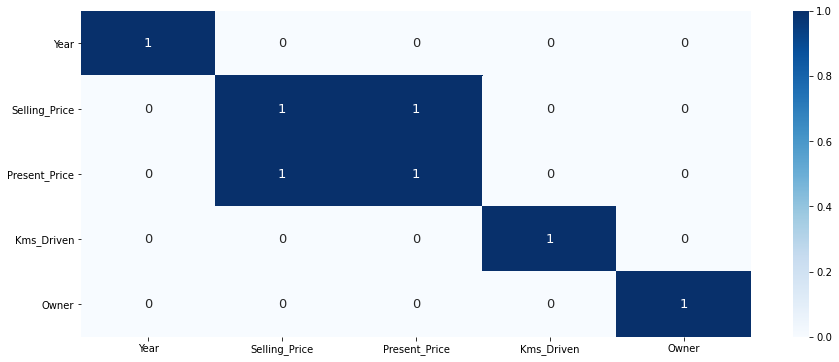

In [13]:
plt.figure(figsize=(15,6))
sns.heatmap(np.abs(df_num.corr()) > 0.8,annot=True,annot_kws = {'size':13},cmap='Blues')
plt.show()

**Selling Price and Present Price are Highly Corelated**

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the impact of present price of the car and seller type on the selling price?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
# type your code here

df_car.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [15]:
X1  =df_car['Present_Price']

encode_seller_type = pd.get_dummies(data = df_car['Seller_Type'],drop_first=True)

X1 = pd.concat([pd.DataFrame(X1),encode_seller_type],axis=1)

X1 = sm.add_constant(X1)

Y1 = df_car['Selling_Price']

MLR_seller_model = sm.OLS(Y1,X1).fit()

print(MLR_seller_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     548.4
Date:                Sat, 19 Feb 2022   Prob (F-statistic):          1.34e-100
Time:                        20:24:32   Log-Likelihood:                -683.71
No. Observations:                 301   AIC:                             1373.
Df Residuals:                     298   BIC:                             1385.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.5423      0.261      5.901

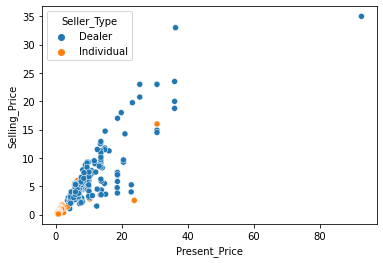

In [16]:
sns.scatterplot(x=df_car['Present_Price'],y=df_car['Selling_Price'],hue=df_car['Seller_Type'])
plt.show()

P-value is less than 0.05 in both of the Seller Type and Present Price 
By Above Graph , Present Price and Seller Type are positively correlated with Selling Price
There are More No of Dealers than Individuals

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Consider all the numeric features in the data. Do all of them significantly contribute to explaining the variation in the selling price?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
# type your code here

X2  =df_num.drop('Selling_Price',axis=1)

X2 = sm.add_constant(X2)

Y2 = df_car['Selling_Price']

MLR_Numerical_model = sm.OLS(Y2,X2).fit()

print(MLR_Numerical_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     426.6
Date:                Sat, 19 Feb 2022   Prob (F-statistic):          1.66e-121
Time:                        20:24:33   Log-Likelihood:                -628.25
No. Observations:                 301   AIC:                             1267.
Df Residuals:                     296   BIC:                             1285.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -937.7642     94.392     -9.935

In [18]:
list1 = MLR_Numerical_model.pvalues
list1[list1>0.05].index

Index(['Kms_Driven'], dtype='object')

No , Kms_Driven is Not Significant since p_value > 0.05...all others variables are equally contributing in explaining the target variable

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. In the model obtained in question 4, consider the interaction effect of the present price of the car and the year in which it was purchased. Compare the resultant model with the model obtained in previous question and give your interpretation 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
X2['Present_Price*Year'] = X2['Present_Price'] * X2['Year']

In [20]:
# type your code here

X2 = sm.add_constant(X2)

Y2 = df_car['Selling_Price']

MLR_Interaction_model = sm.OLS(Y2,X2).fit()

print(MLR_Interaction_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     1546.
Date:                Sat, 19 Feb 2022   Prob (F-statistic):          3.05e-209
Time:                        20:24:34   Log-Likelihood:                -418.79
No. Observations:                 301   AIC:                             849.6
Df Residuals:                     295   BIC:                             871.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                101.2676     58

In [21]:
MLR_Interaction_model.rsquared_adj

0.9626282917497992

Adjusted Rsquared is increased from 0.85 to 0.96 and the p_value of Interaction feature is < 0.05 , so the model is improved by the interaction effect

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What is the impact of fuel type of cars on the selling price? 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
df_car.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [23]:
X3  = pd.get_dummies(data = df_car['Fuel_Type'],drop_first=True)

X3 = sm.add_constant(X3)

Y3 = df_car['Selling_Price']

MLR_Numerical_model = sm.OLS(Y3,X3).fit()

print(MLR_Numerical_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     65.41
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           2.80e-24
Time:                        20:24:34   Log-Likelihood:                -861.21
No. Observations:                 301   AIC:                             1728.
Df Residuals:                     298   BIC:                             1740.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1000      3.006      1.031      0.3

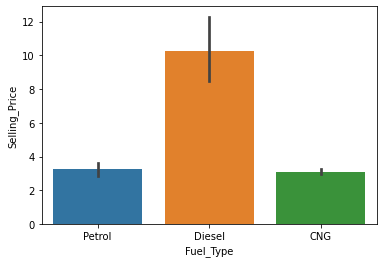

In [24]:
sns.barplot(df_car['Fuel_Type'],y=df_car['Selling_Price'])
plt.show()

If the Car is Diesel Type, then the Selling Price increases by 7.17 lakhs
If the Car is Petrol Type, then the Selling PRice increases by 0.16 lakhs

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Does the model significantly explain variation in the target variable? Justify your answer with analysis of variation 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

            Regress the selling price over the transmission.
            
            Selling_Price ~ Transmission

In [25]:
mlr_regress_model = ols(formula = 'Selling_Price ~ Transmission',data = df_car).fit()
print(mlr_regress_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     46.58
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           4.90e-11
Time:                        20:24:35   Log-Likelihood:                -894.20
No. Observations:                 301   AIC:                             1792.
Df Residuals:                     299   BIC:                             1800.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  9

In [26]:
model = anova_lm(mlr_regress_model)
model

,df,sum_sq,mean_sq,F,PR(>F)
Transmission,1.0,1044.632231,1044.632231,46.577926,4.901447e-11
Residual,299.0,6705.859764,22.427625,NaN,NaN


In [27]:
#F stats is high and p_value is low, Hence it is significant

In [28]:
df_car['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [29]:
statistics,p_value = st.f_oneway(df_car[df_car['Transmission'] == 'Manual']['Selling_Price'],
           df_car[df_car['Transmission'] == 'Automatic']['Selling_Price'])

In [30]:
statistics,p_value

(46.577925571413346, 4.901447474872776e-11)

In [31]:
if p_value > 0.05:
    print('Not Significant')
else:
    print('Significant')

Significant


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Regress the selling price over the present price. Compare the 99% and 95% confidence interval of present price of a car
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
mlr_regress_model = ols(formula = 'Selling_Price ~ Present_Price',data = df_car).fit()
print(mlr_regress_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     1016.
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           3.60e-98
Time:                        20:24:36   Log-Likelihood:                -693.08
No. Observations:                 301   AIC:                             1390.
Df Residuals:                     299   BIC:                             1398.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.7185      0.187      3.847

In [33]:
mlr_regress_model.conf_int(alpha=0.05) # 95% CI

,0,1
Intercept,0.350972,1.086083
Present_Price,0.484938,0.548760


In [34]:
mlr_regress_model.conf_int(alpha=0.01) # 99% CI

,0,1
Intercept,0.234343,1.202712
Present_Price,0.474812,0.558886


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>9. Verify the statement: The sum of the residuals in any regression model that contains an intercept β<sub>0</sub> is always zero
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

        To verify the result, we will fit a regression model of 'Present_Price' on 'Selling_Price' 

In [35]:
mlr_regress_model = ols(formula = 'Selling_Price ~ Present_Price',data = df_car).fit()
print(mlr_regress_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     1016.
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           3.60e-98
Time:                        20:24:37   Log-Likelihood:                -693.08
No. Observations:                 301   AIC:                             1390.
Df Residuals:                     299   BIC:                             1398.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.7185      0.187      3.847

In [36]:
sum_resid = np.sum(mlr_regress_model.resid)

if sum_resid > 0:
    print('The Statement is False')
else:
    print('The Statement is True')

The Statement is False


In [37]:
np.exp(sum_resid)

1.000000000000135

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Consider two models as specified below. Compare the performance of the models
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

                First model:
        
        Selling_Price ~ Year + Present_Price + Kms_Driven + Owner + Fuel_Type + Seller_Type + Transmission
        
        
                Second model:
        
        Selling_Price ~ Year + Present_Price + Kms_Driven + Owner 

In [49]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size = 0.70,random_state =1)

In [50]:
mlr_first_model = sm.OLS(y_train,x_train).fit()

print(mlr_first_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     191.2
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           1.35e-89
Time:                        20:33:48   Log-Likelihood:                -423.34
No. Observations:                 210   AIC:                             864.7
Df Residuals:                     201   BIC:                             894.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -844

In [52]:
first_model_y_train_pred = mlr_first_model.predict(x_train)

first_model_y_test_pred = mlr_first_model.predict(x_test)

In [53]:
mean_squared_error(y_train,first_model_y_train_pred)

3.299929773679067

In [55]:
np.sqrt(mean_squared_error(y_test,first_model_y_test_pred))

1.6671692263227085

In [66]:
# Building Second Model

In [64]:
mlr_second_model = sm.OLS(y_train,x_train[['Year','Present_Price','Kms_Driven','Owner']]).fit()

print(mlr_second_model.summary())

                                 OLS Regression Results                                
Dep. Variable:          Selling_Price   R-squared (uncentered):                   0.889
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                              412.4
Date:                Sat, 19 Feb 2022   Prob (F-statistic):                    4.40e-97
Time:                        20:47:32   Log-Likelihood:                         -479.95
No. Observations:                 210   AIC:                                      967.9
Df Residuals:                     206   BIC:                                      981.3
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [67]:
second_model_y_train_pred = mlr_second_model.predict(x_train[['Year','Present_Price','Kms_Driven','Owner']])

second_model_y_test_pred = mlr_second_model.predict(x_test[['Year','Present_Price','Kms_Driven','Owner']])

In [57]:
cols = ['Model_Name','R-Squared','Adj.R-Squared','MSE','RMSE','MAE','MAPE']
final_observation = pd.DataFrame(columns = cols)

In [58]:
final_observation

,Model_Name,R-Squared,Adj.R-Squared,MSE,RMSE,MAE,MAPE


In [59]:
def MAPE(actual,predicted):
    return np.mean(np.abs((actual/predicted)/actual) *100)

In [62]:
MLR_first_model_metrics = pd.Series({'Model_Name' : "MLR_first_model",
                                     'R-Squared' : mlr_first_model.rsquared,
                                    'Adj.R-Squared' : mlr_first_model.rsquared_adj,
                                     'MSE' : mean_squared_error(y_test,first_model_y_test_pred),
                                     'RMSE':np.sqrt(mean_squared_error(y_test,first_model_y_test_pred)),
                                    'MAE' :mean_absolute_error(y_test,first_model_y_test_pred),
                                    'MAPE' : MAPE(y_test,first_model_y_test_pred)})

final_observation = final_observation.append(MLR_first_model_metrics,ignore_index=True)

In [70]:
MLR_second_model_metrics = pd.Series({'Model_Name' : "MLR_second_model",
                                     'R-Squared' : mlr_second_model.rsquared,
                                    'Adj.R-Squared' : mlr_second_model.rsquared_adj,
                                     'MSE' : mean_squared_error(y_test,second_model_y_test_pred),
                                      'RMSE':np.sqrt(mean_squared_error(y_test,second_model_y_test_pred)),
                                    'MAE' :mean_absolute_error(y_test,second_model_y_test_pred),
                                    'MAPE' : MAPE(y_test,second_model_y_test_pred)})

final_observation = final_observation.append(MLR_second_model_metrics,ignore_index=True)

In [71]:
final_observation

,Model_Name,R-Squared,Adj.R-Squared,MSE,RMSE,MAE,MAPE
0,MLR_first_model,0.883848,0.879225,2.779453,1.667169,1.101357,561.774182
1,MLR_second_model,0.888978,0.886822,4.230343,2.056780,1.370664,38.983721


In [72]:
# RMSE is less in first_model than the second model.